In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis
import numpy as np
import os
import matplotlib as mpl
import seaborn as sns
import logging
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

logging.getLogger().setLevel(logging.WARNING)
%matplotlib widget

In [34]:
all_analysis_folders = get_analysis_folders("data")
plates = [
    "52_20220707",
    "56_20220701",
    "59_20201126",
    "69_20201119",
    "76_20210108",
    "81_20220704",
    "84_20220621",
    "94_20201123",
    "102_20201226",
    "152_20201224",
    "792_20210915",
    "1076_20220511",
    "941_20220404"
]
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,use_saved=False)
time_plate_info['day'] = (time_plate_info["time_since_begin_h"]/24).astype(int)
path_root = r"data\csv_new"
paths = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table = pd.DataFrame()
num_day = 3
for path in paths:
    new= pd.read_csv(os.path.join(path_root,path))
    new['csv_id'] = path
    table = pd.concat([table,new])
table["days"] = table["time_since_crossing"] / pd.Timedelta(days=1)
table["3days"] = (table["time_since_crossing"] / pd.Timedelta(days=num_day)).astype(int)
table["days_since_first_image"] = table["days"] - table.groupby("unique_id")[
    "days"
].transform("min")
table["abs_speed-"] = -table["speed-"]

table["speed"] = table[["speed+", "abs_speed-"]].max(1)
grouping = 1
table["lengthdm"] = (np.log2((table["tot_length"]))/grouping).astype(int) * grouping
table["log_tot_num_spores"] = (np.log2((table["tot_num_spore"]))/grouping).astype(int)* grouping
table["log_tot_num_spores"] = (np.log10((table["tot_num_spore"])))

grouping = 1
funtype = 1
time_plate_info["log_tot_num_spores"] = ((((time_plate_info["num_spores"])/grouping)**funtype).round()* (grouping)**funtype)**(1/funtype)
path_root = r"data\csv_new"

path_all = r"data\AllSpeeds"
table_speeds = pd.DataFrame()

places = [path.split('.')[0] for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
for i,path in enumerate(paths):
    table_loc = pd.read_csv(os.path.join(path_root,path))
    table_loc['csv_id'] = path
    
    table_loc['days'] = table_loc['time_since_crossing']/pd.Timedelta(days=1)
    
    for j in range(len(table_loc)):
        kymo_id = table_loc['kymo_id'].iloc[j]
        path_subtable = os.path.join(path_all,places[i],f'{places[i]}_kymoID{kymo_id}.csv')
        try:
            subtable = pd.read_csv(path_subtable,sep=',').transpose()
            subtable['folder'] = table_loc['folder'].iloc[j]
            subtable['kymo_id'] = table_loc['kymo_id'].iloc[j]
            subtable['speed'] = subtable.index   
            subtable['speed'] = subtable['speed'].astype(float)
            subtable['tot_num_spore'] = table_loc['tot_num_spore'].iloc[j]
            subtable['days'] = table_loc['days'].iloc[j]
            subtable['unique_id'] = table_loc['unique_id'].iloc[j]
            subtable['csv_id'] = table_loc['csv_id'].iloc[j]
            table_speeds = pd.concat([table_speeds,subtable])
        except:
            continue
        
        
grouping = 1

# table_speeds["log_tot_num_spores"] = (np.log2((table_speeds["tot_num_spore"]))/grouping).astype(int)* grouping
table_speeds["log_tot_num_spores"] = np.log10((table_speeds["tot_num_spore"]))
table_speeds["abs_speed"] = abs(table_speeds['speed']) 
table_speeds = table_speeds.set_index(['csv_id','kymo_id'])
table = table.set_index(['csv_id','kymo_id'])
speedp = table_speeds.loc[table_speeds['speed']>0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table['mean_speed+'] = mean_speed
speedp = table_speeds.loc[table_speeds['speed']<0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table['mean_speed-'] = mean_speed
table["mean_speed+"] = table["mean_speed+"].fillna(table["speed+"])
table["mean_speed-"] = table["mean_speed-"].fillna(table["speed-"])
table["ratio"] = -table["mean_speed+"]/table["mean_speed-"]


In [35]:
path_root = r"data\csv_bet_2"
paths_bet = [path for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
table_bet = pd.DataFrame()
for path in paths_bet:
    new= pd.read_csv(os.path.join(path_root,path))
    new['csv_id'] = path
    table_bet = pd.concat([table_bet,new])
table_bet['days'] = table_bet['time_since_crossing']/pd.Timedelta(days=1)
table_bet["days"] = table_bet["time_since_crossing"] / pd.Timedelta(days=1)
table_bet["3days"] = (table_bet["time_since_crossing"] / pd.Timedelta(days=3)).astype(int)
table_bet["days_since_first_image"] = table_bet["days"] - table_bet.groupby("unique_id")[
    "days"
].transform("min")
table_bet["abs_speed-"] = -table_bet["speed-"]

table_bet["speed"] = table_bet[["speed+", "abs_speed-"]].max(1)
path_all = r"data\AllSpeeds"
table_speeds_bet = pd.DataFrame()

places = [path.split('.')[0] for path in os.listdir(path_root) if path.split('.')[-1]=='csv']
for i,path in enumerate(paths_bet):
    table_loc = pd.read_csv(os.path.join(path_root,path))
    table_loc['days'] = table_loc['time_since_crossing']/pd.Timedelta(days=1)
    table_loc['csv_id'] = path
    
    for j in range(len(table_loc)):
        kymo_id = table_loc['kymo_id'].iloc[j]
        path_subtable = os.path.join(path_all,places[i],f'{places[i]}_kymoID{kymo_id}.csv')
        try:
            subtable = pd.read_csv(path_subtable,sep=',').transpose()
            subtable['folder'] = table_loc['folder'].iloc[j]
            subtable['kymo_id'] = table_loc['kymo_id'].iloc[j]
            subtable['speed'] = subtable.index   
            subtable['speed'] = subtable['speed'].astype(float)
            # subtable['tot_num_spore'] = table_loc['tot_num_spore'].iloc[j]
            subtable['days'] = table_loc['days'].iloc[j]
            subtable['unique_id'] = table_loc['unique_id'].iloc[j]
            subtable['normalized_random_betweenness'] = table_loc['normalized_random_betweenness'].iloc[j]
            subtable['normalized_betweenness'] = table_loc['normalized_random_betweenness'].iloc[j]
            subtable['betweenness'] = table_loc['betweenness'].iloc[j]
            subtable['dist_tip'] = table_loc['dist_tip'].iloc[j]
            subtable['num_nodes_tip'] = table_loc['num_nodes_tip'].iloc[j]
            subtable['is_anastomosing'] = table_loc['is_anastomosing'].iloc[j]
            subtable['random_betweenness'] = table_loc['random_betweenness'].iloc[j]
            subtable['csv_id'] = table_loc['csv_id'].iloc[j]
            table_speeds_bet = pd.concat([table_speeds_bet,subtable])
        except:
            continue
        
        
grouping = 1

# table_speeds["log_tot_num_spores"] = (np.log2((table_speeds["tot_num_spore"]))/grouping).astype(int)* grouping
# table_speeds_bet["log_tot_num_spores"] = np.log10((table_speeds_bet["tot_num_spore"]))
table_speeds_bet["abs_speed"] = abs(table_speeds_bet['speed']) 
table_speeds_bet = table_speeds_bet.set_index(['csv_id','kymo_id'])
table_bet = table_bet.set_index(['csv_id','kymo_id'])
speedp = table_speeds_bet.loc[table_speeds_bet['speed']>0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table_bet['mean_speed+'] = mean_speed
speedp = table_speeds_bet.loc[table_speeds_bet['speed']<0]
mean_speed = speedp.groupby(['csv_id','kymo_id'])['speed'].mean()
table_bet['mean_speed-'] = mean_speed
mean_speed = table_speeds_bet.groupby(['csv_id','kymo_id'])['abs_speed'].mean()
table_bet['mean_speed_abs'] = mean_speed
table_bet["mean_speed+"] = table_bet["mean_speed+"].fillna(table_bet["speed+"])
table_bet["mean_speed-"] = table_bet["mean_speed-"].fillna(table_bet["speed-"])
table_bet["mean_speed_abs"] = table_bet["mean_speed_abs"].fillna(table_bet["speed"])
table_bet['days_without'] = table_bet['days']+(table_bet['unique_id']=="799_20211001")*6
table_speeds_bet['days_without'] = table_speeds_bet['days']+(table_speeds_bet['unique_id']=="799_20211001")*6
table_speeds_bet['log_random_betweenness']=np.log(table_speeds_bet['random_betweenness'])
table_speeds_bet['log_normalized_random_betweenness']=np.log(table_speeds_bet['normalized_random_betweenness'])
table_speeds_bet['log_normalized_betweenness']=np.log(table_speeds_bet['normalized_betweenness'])
table_speeds_bet = table_speeds_bet.reset_index()
table_bet = table_bet.reset_index()
table_speeds_bet["dist_tip"]=table_speeds_bet["dist_tip"]*1.725
table_speeds_bet["dist_tip_mm"]=table_speeds_bet["dist_tip"]/1000

In [36]:
csvs = [
    "211012_Plate799.csv",
    "211014_Plate809.csv",
    "201217_Plate09.csv",
    "201217_Plate10.csv",
    "201217_Plate38.csv",
    "211013_Plate809.csv",
    "220324_Plate907.csv" ]

In [37]:
table_bet = table_bet.set_index(['csv_id','kymo_id'])


In [38]:
mask = table_bet.index.get_level_values('csv_id').isin(csvs)
speeds_BC = table_bet[mask]

In [39]:
widths = pd.read_csv("data\measures_width.csv")
average_radius = widths.groupby(['csv_id','video_id'])['measures'].max()/2


In [40]:
speeds_BC = speeds_BC.reset_index()
if speeds_BC.index.names != ['csv_id', 'video_id']:
    speeds_BC.set_index(['csv_id', 'video_id'], inplace=True)
if average_radius.index.names != ['csv_id', 'video_id']:
    average_radius.set_index(['csv_id', 'video_id'], inplace=True)
merged_df = pd.merge(speeds_BC, average_radius, on=['csv_id', 'video_id'], how='left')

# Rename the 'measure' column to 'radius' in merged_df if necessary
merged_df.rename(columns={'measures': 'radius'}, inplace=True)
merged_df = merged_df.reset_index()
merged_df = merged_df[merged_df['radius']>0].copy()
merged_df = merged_df[merged_df['normalized_betweenness']>0].copy()

In [41]:
merged_df['normalized_betweenness_group']=(merged_df['normalized_betweenness']*10).astype(int)/10
merged_df['radius_group']=(merged_df['radius']).astype(int)

In [42]:
unique_csv_ids = merged_df['csv_id'].unique()

In [43]:
def find_corr_std(frame,column1,column2,bootstrap_n=200):
    corr_tot =  frame[column1].corr(frame[column2])
    corr_coeffs = []
    for _ in range(bootstrap_n):
        # Resample the DataFrame with replacement
        sample_df = frame.sample(n=len(frame), replace=True)
        # Compute Pearson's correlation coefficient for the resampled DataFrame
        corr = sample_df[column1].corr(sample_df[column2])
        corr_coeffs.append(corr)
    # Compute the standard deviation of the bootstrapped correlation coefficients
    corr_std = np.std(corr_coeffs)
    return(corr_tot,corr_std)

In [44]:

unique_csv_ids = merged_df['csv_id'].unique()
coefs_radius = {}
# Create a plot for each csv_id
for csv_id in unique_csv_ids:
    coefs_radius[csv_id]={}
    # fig, ax = plt.subplots()
    # Filter the DataFrame for the current csv_id
    filtered_df = merged_df[merged_df['csv_id'] == csv_id]
    max_BC = filtered_df['max_betweenness'].iloc[0]
    min_BC = filtered_df['min_betweenness'].iloc[0]    
    unique_radius = filtered_df['radius_group'].unique()
    # for i, radius in enumerate(unique_radius):
    #     radius_data = filtered_df[filtered_df['radius_group'] == radius]['normalized_betweenness']
    #     if len(radius_data)>=4:
    #         bp = ax.boxplot(radius_data, positions=[radius], widths=0.5, patch_artist=True, boxprops=dict(facecolor="white"))
    # sns.scatterplot(data=filtered_df, x='radius', y='normalized_betweenness', ax=ax)
    # sns.regplot(data=filtered_df, x='radius', y='normalized_betweenness', ax=ax)
    corr,corr_std = find_corr_std(filtered_df,"radius","normalized_betweenness",bootstrap_n=200)
    coefs_radius[csv_id][f'radius_BC_corr'] = corr
    coefs_radius[csv_id][f'radius_BC_corr_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed+","normalized_betweenness",bootstrap_n=200)
    coefs_radius[csv_id][f'speedp_BC_corr'] = corr
    coefs_radius[csv_id][f'speedp_slope_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed-","normalized_betweenness",bootstrap_n=200)
    coefs_radius[csv_id][f'speedm_BC_corr'] = corr
    coefs_radius[csv_id][f'speedm_slope_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed-","radius",bootstrap_n=200)
    coefs_radius[csv_id][f'speedm_radius_corr'] = corr
    coefs_radius[csv_id][f'speedm_radius_corr_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed+","radius",bootstrap_n=200)
    coefs_radius[csv_id][f'speedp_radius_corr'] = corr
    coefs_radius[csv_id][f'speedp_radius_corr_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed+","dist_tip",bootstrap_n=200)
    coefs_radius[csv_id][f'speedp_disttip_corr'] = corr
    coefs_radius[csv_id][f'speedp_disttip_corr_std'] = corr_std
    corr,corr_std = find_corr_std(filtered_df,"speed-","dist_tip",bootstrap_n=200)
    coefs_radius[csv_id][f'speedm_disttip_corr'] = corr
    coefs_radius[csv_id][f'speedm_disttip_corr_std'] = corr_std

In [45]:
# data_slope = pd.DataFrame.from_dict(coefs).transpose()
data_slope_r = pd.DataFrame.from_dict(coefs_radius).transpose()



In [46]:
# merged_slopes = data_slope_r.merge(data_slope,left_index = True,right_index = True)
merged_slopes = data_slope_r

merged_slopes['mean_corr_BC_speed'] = (merged_slopes['speedp_BC_corr'] -merged_slopes['speedm_BC_corr'])/2
merged_slopes['mean_corr_BC_speed_std'] = (merged_slopes['speedp_BC_corr']+merged_slopes['speedm_BC_corr'])/2
merged_slopes['mean_corr_radius_speed'] = (merged_slopes['speedp_radius_corr'] -merged_slopes['speedm_radius_corr'])/2
merged_slopes['mean_corr_radius_speed_std'] = (merged_slopes['speedp_radius_corr_std']+merged_slopes['speedm_radius_corr_std'])/2

Text(0.5, 0, '$r$ ($\\mu m$)')

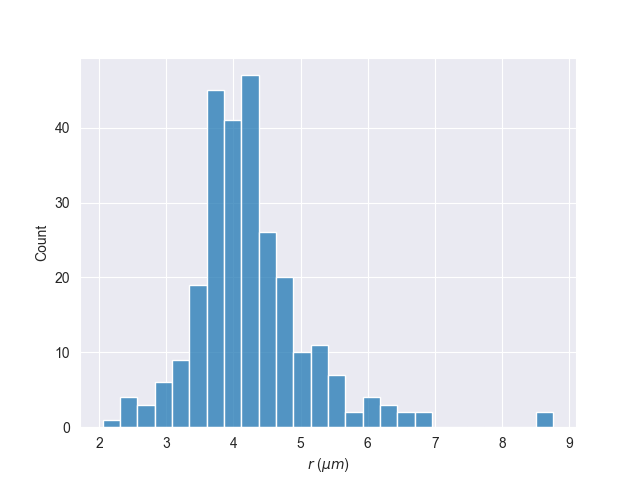

In [47]:
fig, ax = plt.subplots()  # Adjust 'width' and 'height' as needed

sns.histplot(merged_df,x="radius")
ax.set_xlabel('$r$ ($\mu m$)')

C:\Users\coren\AppData\Local\Temp\ipykernel_17500\73776078.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'$\rho_{r,BC}$', r'$\rho_{v_+,BC}$',r'$\rho_{v_-,BC}$', r'$\rho_{v_+,d_{tip}}$',r'$\rho_{v_-,d_{tip}}$',r'$\rho_{v_+,r}$',r'$\rho_{v_-,r}$'])


Text(0, 0.5, 'Pearson correlation')

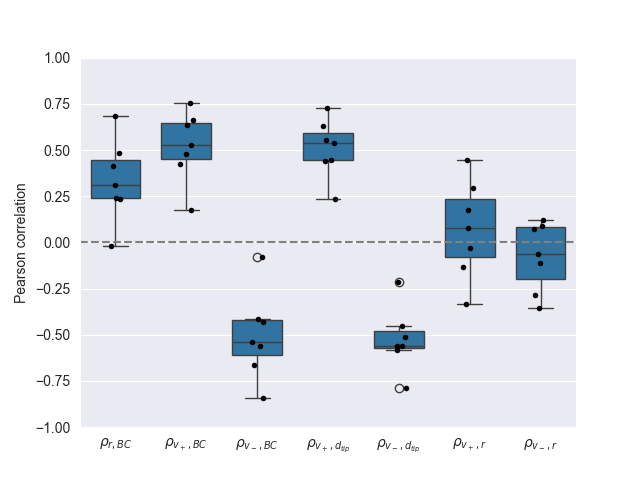

In [48]:
melted_data = pd.melt(merged_slopes, value_vars=['radius_BC_corr', 'mean_corr_BC_speed','mean_corr_radius_speed','speedp_radius_corr','speedm_radius_corr','speedp_BC_corr','speedm_BC_corr'], var_name='type', value_name='corr')
melted_data = pd.melt(merged_slopes, value_vars=['radius_BC_corr','speedp_BC_corr','speedm_BC_corr','speedp_disttip_corr','speedm_disttip_corr','speedp_radius_corr','speedm_radius_corr'], var_name='type', value_name='corr')

fig, ax = plt.subplots()  # Adjust 'width' and 'height' as needed

# Plot boxplot
sns.boxplot(data=melted_data, x='type', y='corr', ax=ax, width=0.7)

# Plot stripplot on top of the boxplot for better visualization
sns.stripplot(data=melted_data, x='type', y='corr', ax=ax, color='black', size=4, jitter=True)
ax.axhline(0, color='gray', linestyle='--')  # Customize color and linestyle as needed
ax.set_xticklabels([r'$\rho_{r,BC}$', r'$\rho_{v_+,BC}$',r'$\rho_{v_-,BC}$', r'$\rho_{v_+,d_{tip}}$',r'$\rho_{v_-,d_{tip}}$',r'$\rho_{v_+,r}$',r'$\rho_{v_-,r}$'])

ax.set_ylim(-1, 1)  # Adjust the limit
ax.set_xlabel("")
ax.set_ylabel("Pearson correlation")


In [49]:
data = pd.read_csv('data/483_20231005_new.csv')
data_whole = pd.read_csv('data/BC_dataA5.csv')
data = data.loc[data['BC']>1e-6]
data["logBC"]=np.log10(data["BC"])

C:\Users\coren\AppData\Local\pypoetry\Cache\virtualenvs\amftrack-YdvNN67V-py3.11\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\coren\AppData\Local\Temp\ipykernel_17500\3178837929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["logBC"]=np.log10(data["BC"])


Text(0.5, 0, '$log_{10}(BC)$')

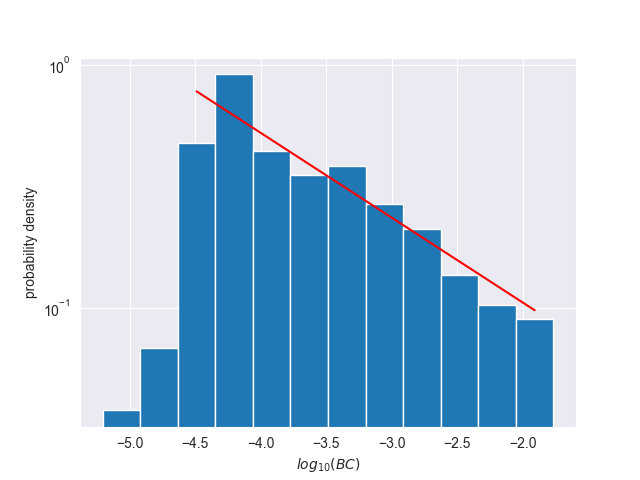

In [50]:
from scipy.stats import linregress

fig,ax = plt.subplots()
data = data_whole.loc[data_whole['unique_id']=="401_20231123"]
data["logBC"]=np.log10(data["BC"])

data = data.loc[data['BC']>1e-10]
counts, bins = np.histogram(data["logBC"], bins=10, weights=data['length'], density=True)

miniBC = np.min(bins[np.where(counts>0.02)])
peakBC = bins[np.argmax(counts)]    
data = data.loc[data['BC']>10**miniBC]
ax.hist(data["logBC"], bins=12, weights=data['length'], density=True)
data = data.loc[data['BC']>10**peakBC]

counts, bins = np.histogram(data["logBC"], bins=10, weights=data['length'], density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
slope, intercept, r_value, p_value, std_err = linregress(bin_centers, np.log(counts))
x = np.linspace(min(bin_centers), max(bin_centers), 100)
y = np.exp(intercept + slope * x)
slope, intercept, r_value, p_value, std_err = linregress(bin_centers, np.log10(counts))

ax.plot(x, y, 'r-', label=f'Linear fit: slope={slope:.2f}')
ax.set_yscale('log')
ax.set_ylabel('probability density')
ax.set_xlabel('$log_{10}(BC)$')


In [56]:
path = r"data/002.tif"
out_address = r"data"
from amftrack.pipeline.functions.transport_processing.high_mag_videos.kymo_class import *
from scipy.signal import find_peaks
import os
from pathlib import Path
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from glob import glob
from tqdm import tqdm
from tifffile import imwrite

In [57]:
space_resolution = 1.725/2
# space_resolution = 1

fps = 15
display_kymos = False

address_list = [Path(address) for address in glob(path)]
kymo_stack = [imageio.imread(address) for address in address_list]
kymo_edge_list = [
    KymoEdgeAnalysis(kymo=kymo, edge_name=address_list[i].stem, address=out_address)
    for i, kymo in enumerate(kymo_stack)
]

for i, kymo_anal in enumerate(tqdm(kymo_edge_list)):
    title = address_list[i].name.split(".")[-2]
    imshow_extent = [
        0,
        space_resolution * kymo_anal.kymo.shape[1],
        1 / fps * kymo_anal.kymo.shape[0],
        0,
    ]
    kymo_anal.space_pixel_size = space_resolution
    kymo_anal.time_pixel_size = 1 / fps
    forw_thresh, back_thresh = kymo_anal.fourier_kymo(1)

100%|██████████| 1/1 [00:05<00:00,  5.87s/it]


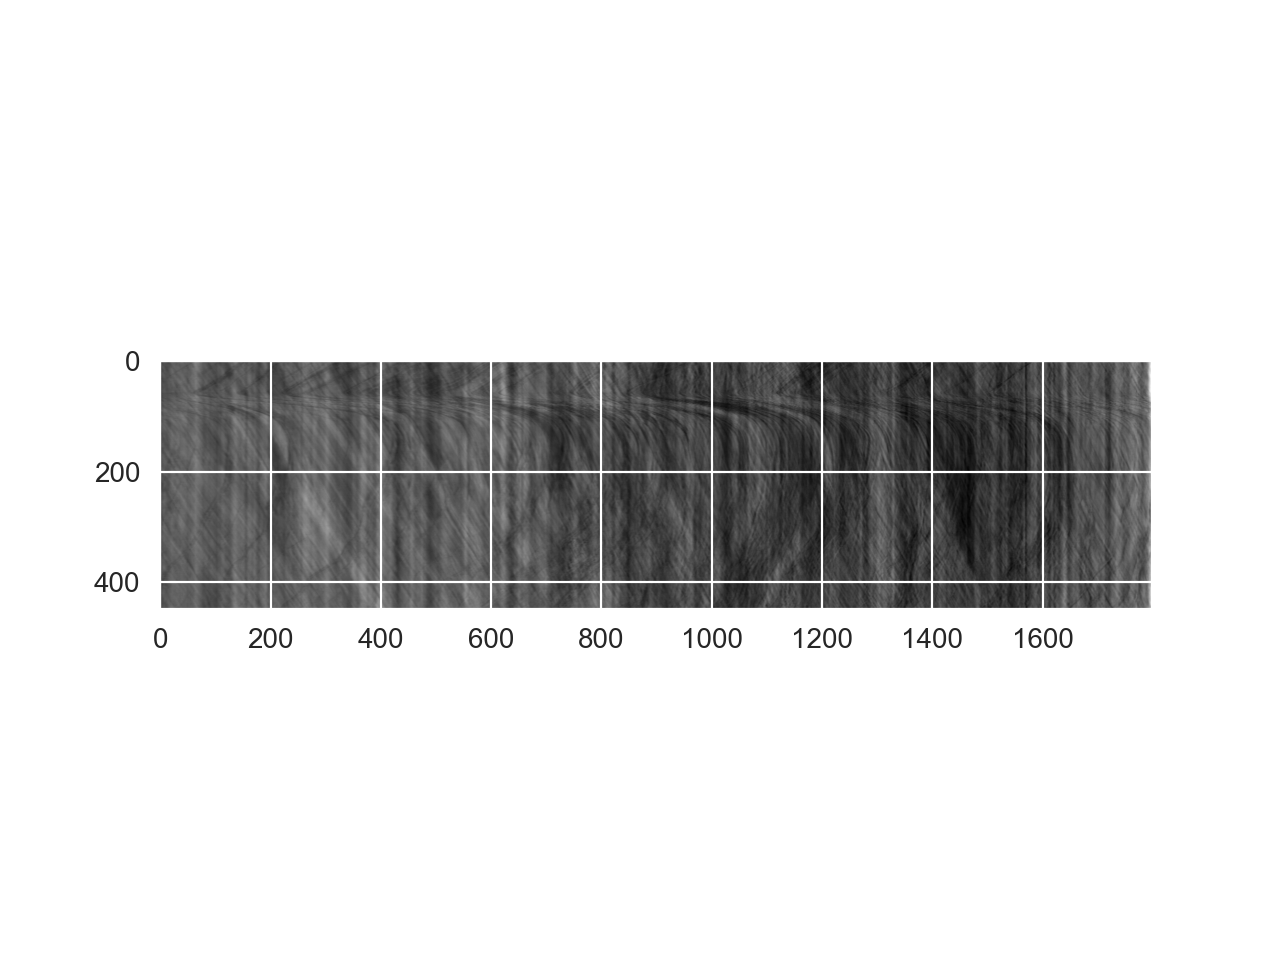

In [58]:
fig,ax =plt.subplots()
ax.imshow(kymo_stack[0],cmap="gray")

In [59]:
speeds,time = kymo_edge_list[0].extract_speeds(11)


def average_speed_region(speed_matrix, region_width=200):
    n_regions = speed_matrix.shape[1] // region_width
    data = []

    for i in range(n_regions):
        start_idx = i * region_width
        end_idx = start_idx + region_width
        region_avg_speed = np.nanmean(speed_matrix[:, start_idx:end_idx], axis=1)
        for t, speed in enumerate(region_avg_speed):
            data.append({'Time': t/fps, 'Average Speed': speed, 'Region': start_idx})
    
    return pd.DataFrame(data)

# Assuming 'speeds' is defined and 'speed_matrix' has the right dimensions
speed_matrix = speeds[0][1][10:-10, :]  # Adjust as per your actual data setup
df = average_speed_region(speed_matrix,300)


Text(0, 0.5, 'speed ($\\mu m/s$)')

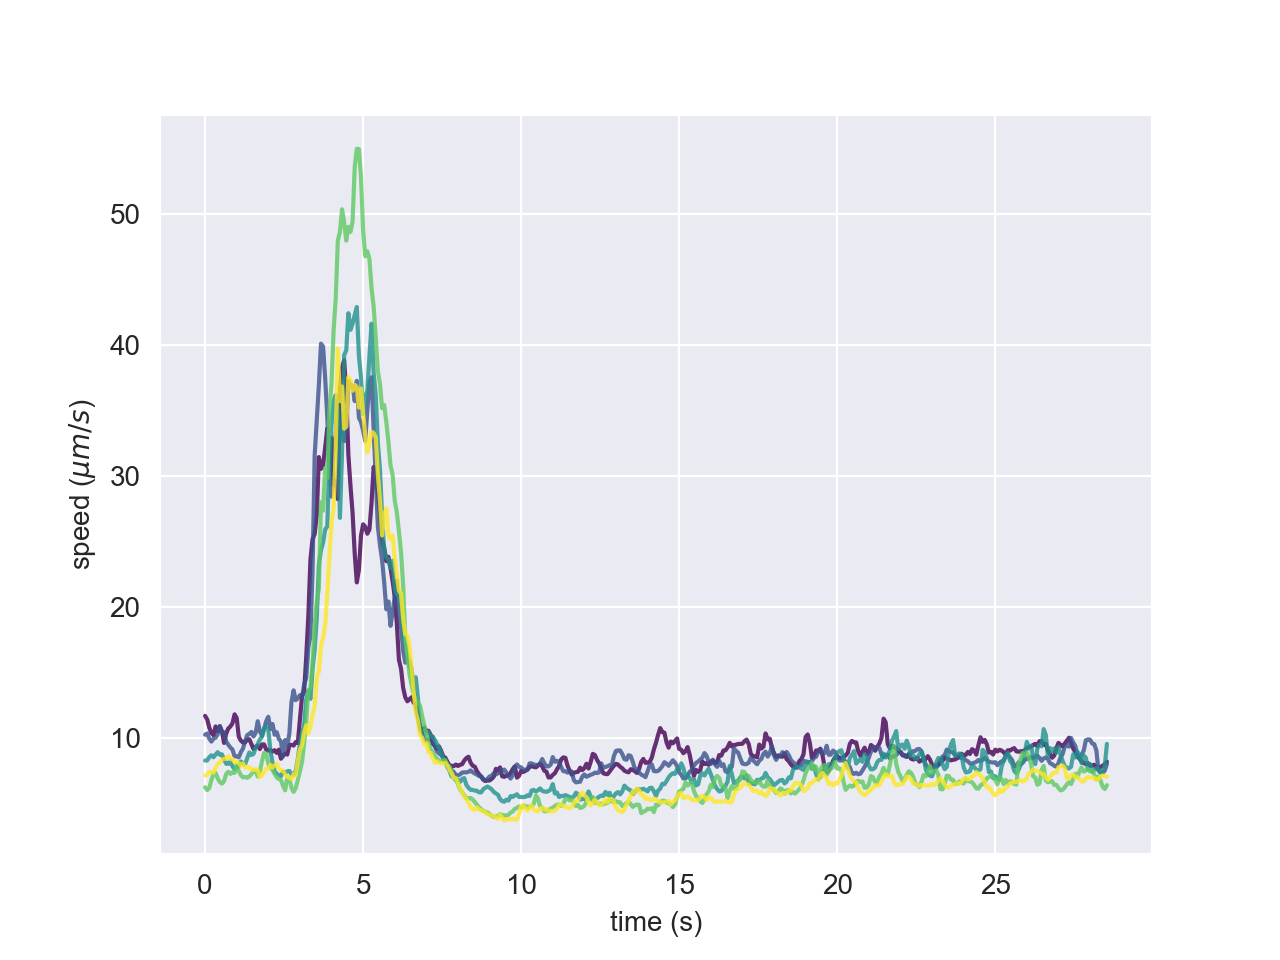

In [60]:
import seaborn as sns
fig,ax =plt.subplots()
select = df[df['Region']>=0]
lineplot = sns.lineplot(data=select, x='Time', y='Average Speed', hue='Region', palette='viridis',alpha = 0.8)
lineplot.legend_.remove()  # This removes the legend from the plot
ax.set_xlabel("time (s)")
ax.set_ylabel("speed ($\mu m/s$)")

Text(0, 0.5, 'correlation')

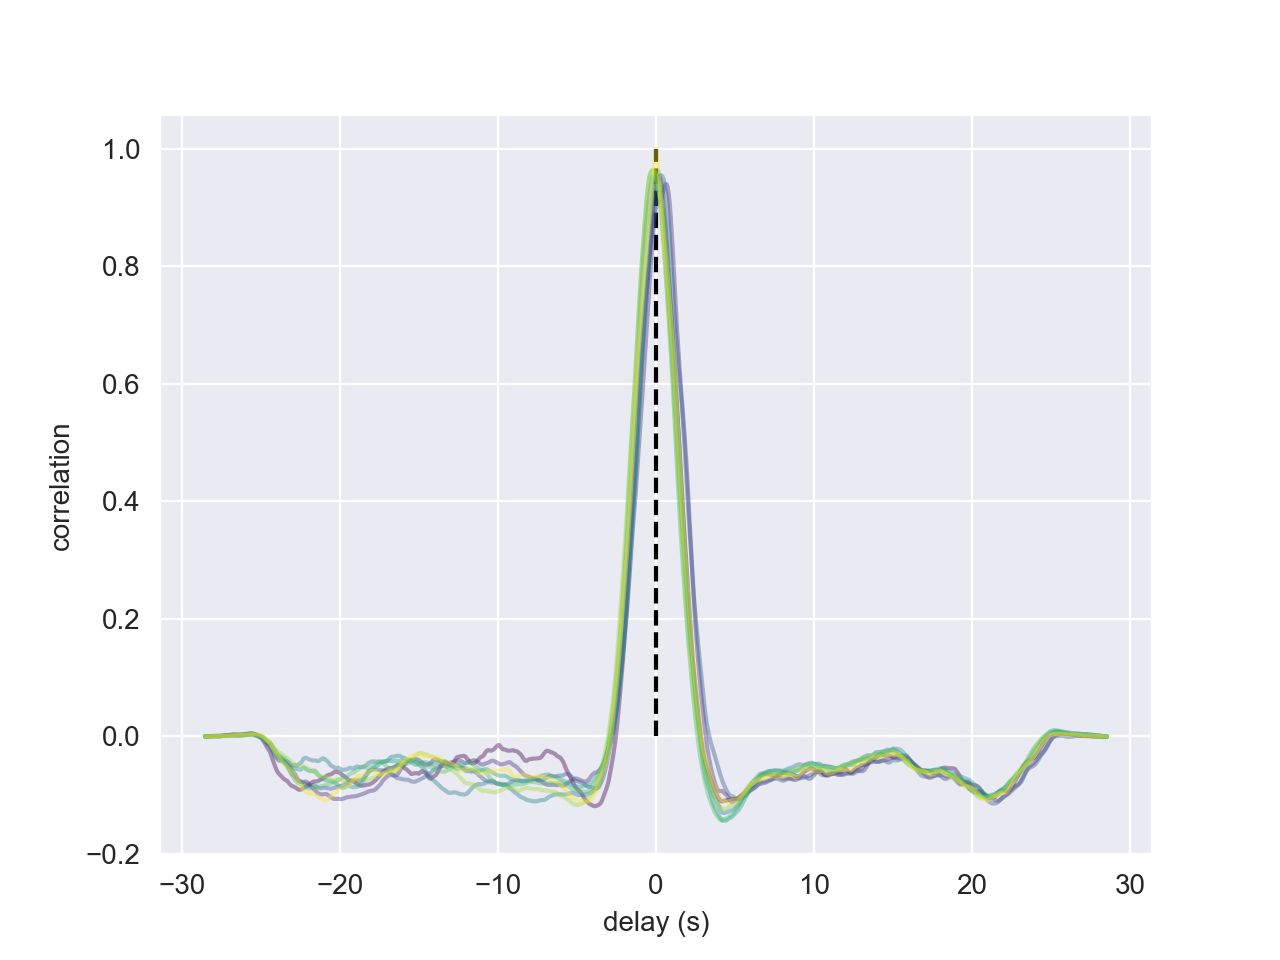

In [61]:
speed_matrix = speeds[0][1][10:-10, :]  # Adjust as per your actual data setup
df = average_speed_region(speed_matrix,200)
from scipy.signal import correlate
signal1 = df[df['Region']==1400].sort_values(by = 'Time')["Average Speed"]
fig, ax = plt.subplots()
ax.vlines(0,0,1,color="black",linestyle = "dashed")

regions = df['Region'].unique()
cmap = plt.cm.viridis  # Use the viridis colormap
colors = cmap(np.linspace(0, 1, len(regions)))
idxmaxs = []
dists = []
for idx, value in enumerate(regions):
    # Filter data for the current region and sort by Time
    signal2 = df[df['Region'] == value].sort_values(by='Time')["Average Speed"]
    
    # Normalization function
    normalize = lambda signal: (signal - np.mean(signal)) / np.std(signal)
    
    # Calculate the correlation
    corr = correlate(normalize(signal1), normalize(signal2), method='auto') / len(signal1)
    lag = np.arange(-len(signal1) + 1, len(signal1))/fps
    
    # Plot each correlation with a color from the colormap
    ax.plot(lag, corr, color=colors[idx],alpha = 0.4)
    idxmaxs.append(lag[np.argmax(corr)])
    dists.append(np.abs(value-1600))
    
ax.set_xlabel("delay (s)")
ax.set_ylabel("correlation")

(-10.0, 10.0)

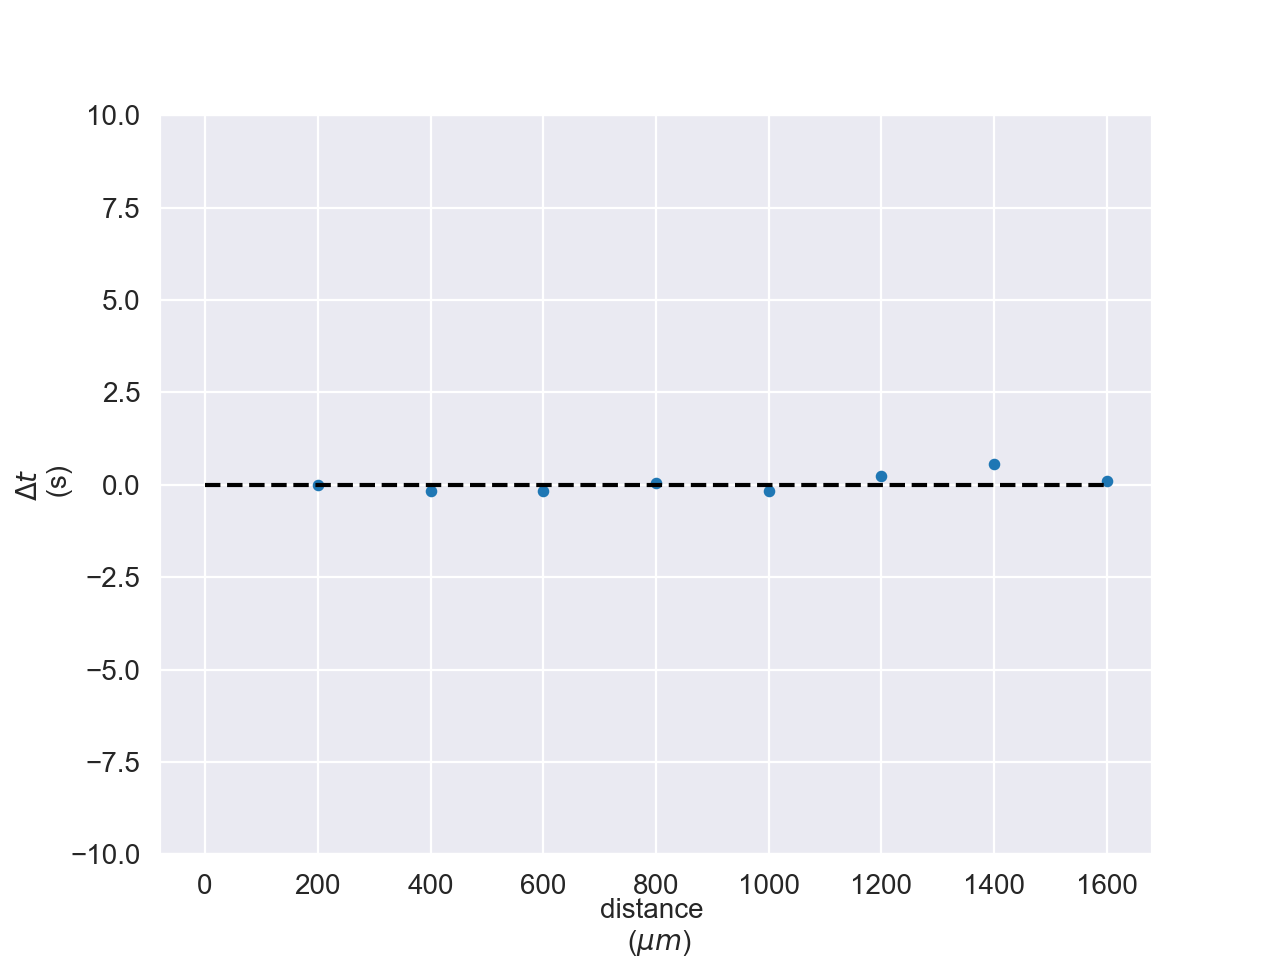

In [63]:
fig, ax = plt.subplots()
ax.hlines(0,0,np.max(dists),color="black",linestyle = "dashed")

x = np.array(idxmaxs)*1.725/2
ax.scatter(dists,x,s=10)
ax.set_ylabel("$\Delta t$ \n (s)", labelpad=-1)
ax.set_xlabel("distance \n ($\mu m$)", labelpad=-0.80)
ax.set_ylim(-10,10)